In [1]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from tqdm import tqdm

In [2]:
cp.cuda.Device()

<CUDA Device 0>

CuPy, as Pytorch and TensorFlow, has a variable of the current device, which is the processing unit on which the allocation and manipulation of data is performed. By default this is the first available GPU device.
Numpy only has ability to perform computations and store data on CPU.

cupy.asarray() can be used to move a numpy.ndarray, a list, or any object that can be passed to numpy.array() to the current device (GPU).

In [3]:
x_cpu = np.array([1, 2, 3])
x_gpu = cp.asarray(x_cpu)  # move the data to the current device
x_gpu.device, x_gpu

(<CUDA Device 0>, array([1, 2, 3]))

In [4]:
x_cpu = cp.asnumpy(x_gpu)  # move the data back to CPU
x_cpu

array([1, 2, 3])

In [5]:
def np_saxpy(x, y, a):
    return x*a + y

@cp.fuse()
def cp_saxpy(x, y, a):
    return x*a + y

In [6]:
np_results = []
cp_results = []
sizes = np.logspace(1, 8, 50)

for size in tqdm(sizes):
    size = int(size)
    x = np.random.rand(size).astype(np.float32)
    y = np.random.rand(size).astype(np.float32)
    a = np.random.rand(1)
    t_np = %timeit -o -q np_saxpy(x, y, a);
    x = cp.asarray(x)
    y = cp.asarray(y)
    a = cp.asarray(a)
    t_cp = %timeit -o -q cp_saxpy(x, y, a);
    np_results.append(t_np)
    cp_results.append(t_cp)

100%|███████████████████████████████████████████| 50/50 [17:51<00:00, 21.44s/it]


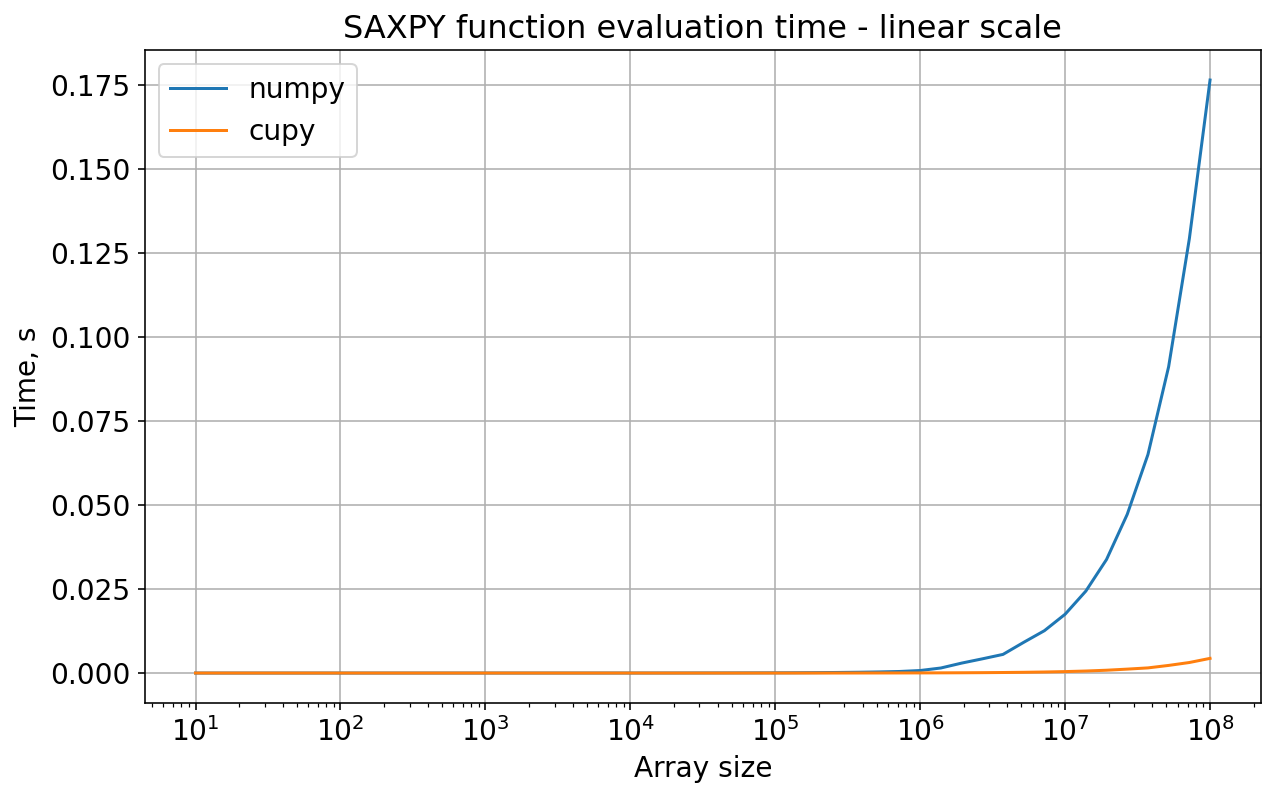

In [11]:
plt.figure(figsize=(10,6))
plt.plot(sizes, [i.average for i in np_results])
plt.plot(sizes, [i.average for i in cp_results])
plt.title('SAXPY function evaluation time - linear scale', fontsize=16)
plt.xlabel('Array size', fontsize=14)
plt.ylabel('Time, s', fontsize=14)
plt.xscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['numpy', 'cupy'], fontsize=14);
plt.grid()
plt.show()

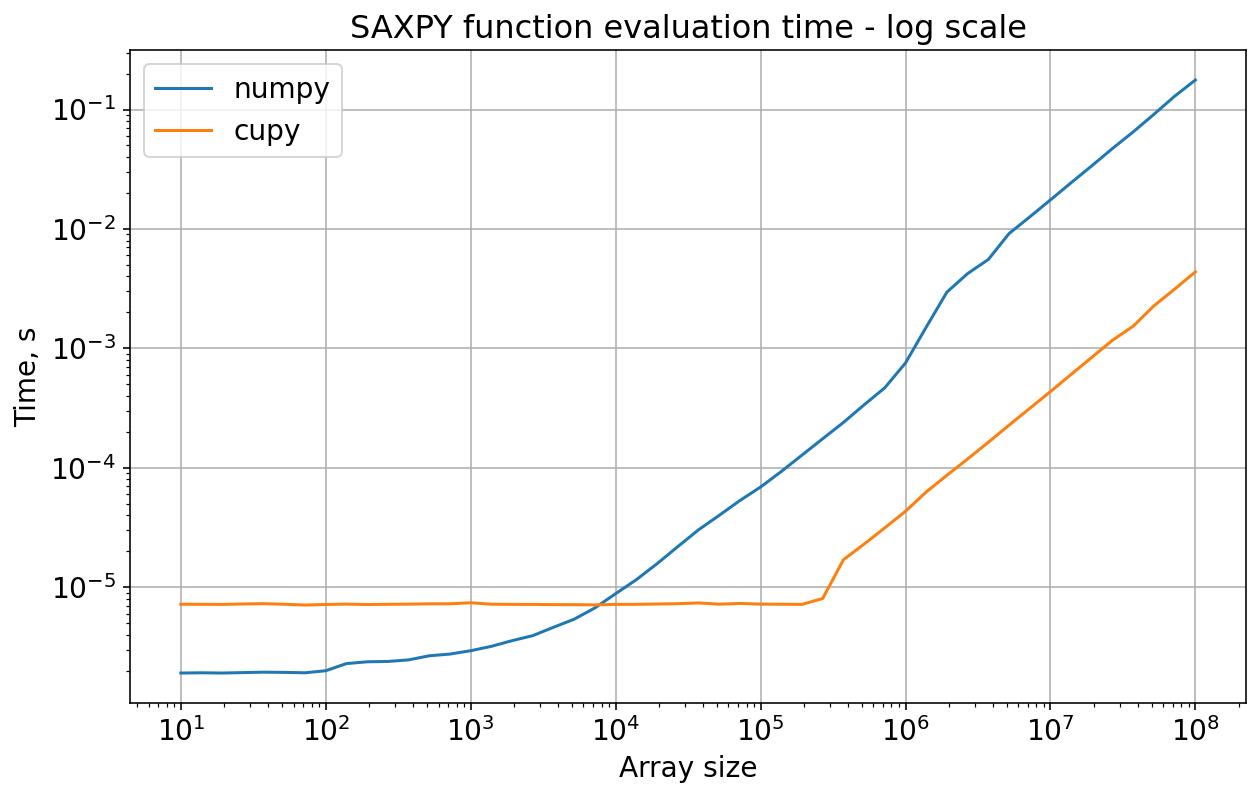

In [12]:
plt.figure(figsize=(10,6))
plt.plot(sizes, [i.average for i in np_results])
plt.plot(sizes, [i.average for i in cp_results])
plt.title('SAXPY function evaluation time - log scale', fontsize=16)
plt.xlabel('Array size', fontsize=14)
plt.ylabel('Time, s', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['numpy', 'cupy'], fontsize=14);
plt.grid()
plt.show()